# Project: Wrangling and Analyze Data

In [2]:
#imports of all the modules needed in the project
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering


1. Direct download twitter-archive-enhanced.csv

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
#url to the image prediction file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#checking if response is successful, if so then we download the file
if response.status_code == 200:
    print('successful')
    
    with open('image-prediction.tsv', 'wb') as file:
        file.write(response.content)
else:
    print('File not found')

successful


3. I was unable to get access to the tweet api and used the dataset provided by Udacity.

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [3]:
#making df of the .txt data
df_list = []

#open the txt file
with open('tweet-json.txt') as file:
    #loop through every tweet in the file
    for i in file:
        #use the .loads() to make each tweet a python object for easier manipulation
        data = json.loads(i)
        #get the tweet_id, retweet_count and favorite_count
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        
        #save to a list
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

#check that our list contains all values
len(df_list)    

2354

In [4]:
#lets read our datasets as dataframes
tweet_json_df = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])
twitter_enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')
image_prediction_df = pd.read_csv('image-prediction.tsv', sep='\t')


In [5]:
#lets save the tweet_json_df as a csv
tweet_json_df.to_csv('tweet_json.csv')

## Assessing Data

**Visual Assessment**

**Image Prediction Column names meaning.**
1. tweet_id - the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
2. p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
3. p1_conf is how confident the algorithm is in its #1 prediction → 95%
4. p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
5. p2 is the algorithm's second most likely prediction → Labrador retriever
6. p2_conf is how confident the algorithm is in its #2 prediction → 1%
7. p2_dog is whether or not the #2 prediction is a breed of dog → TRUE

In [6]:
image_prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
twitter_enhanced_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Programatic Assessment

In [8]:
#summary stats
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
#summary stats
twitter_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
#counts of the name column
twitter_enhanced_df.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Lola           10
Tucker         10
Penny          10
Winston         9
Bo              9
the             8
Sadie           8
an              7
Toby            7
Buddy           7
Bailey          7
Daisy           7
Milo            6
Jax             6
Stanley         6
Scout           6
Dave            6
Koda            6
Leo             6
Oscar           6
Bella           6
Jack            6
Rusty           6
Sunny           5
             ... 
Pip             1
Timmy           1
Fabio           1
Hazel           1
Divine          1
Barclay         1
Bobbay          1
Jazz            1
Edd             1
Bodie           1
DonDon          1
Claude          1
Amy             1
Durg            1
Siba            1
Major           1
Bradlay         1
Aiden           1
Duddles         1
Christoper      1
Superpup        1
Banditt         1
Cannon          1
Maisey          1
Chevy     

In [11]:
#summary of the rating numerator column
twitter_enhanced_df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [12]:
#counts of the rating denominator column
twitter_enhanced_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
#Checking the source column
twitter_enhanced_df.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

### Quality issues
*image_prediction_df*

1. There are non breed names in the predictions.

2. useless column - img_num

*twitter_enhanced_df*

3. a. remove retweets.. i.e all records where retweeted_status_id is not null 

3. b. useless columns - in_reply_to_status_id, in_reply_to_user_id retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

4. name column has inappropriate names i.e. a, an, the, just, and None instead of an empty string or NaN

5. source column has the whole url instead of just the source name only i.e *'a href"http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a'*

6. doggo, floofer, pupper, and puppo columns have None string instead of empty string or NaN

7. there are extreme values in the rating_numerator column (1776) and rating_denominator (110, 120, etc.)

8. timestamp data type is object instead of datetime

### Tidiness issues
1. We can make doggo, floofer, pupper and puppo to one column. 

2. Combine the 3 datasets to make one for easier analysis.

## Cleaning Data

In [14]:
# Make copies of original pieces of data
df1 = image_prediction_df.copy()
df2 = twitter_enhanced_df.copy()

### Quality Issues

### Issue #1: There are non breed names in the predictions.

#### Define: Drop those rows

#### Code

In [15]:
#first few rows of the image prediction df
df1.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


I will be using only the p1 predictions(p1, p1_conf, p1_dog). 

In [16]:
#getting columns to be used during cleaning
df1_cut = df1[['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog']]

In [17]:
#counts of the dog breed prediction true or false
df1_cut.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [18]:
#getting a df of only dog breed names
df1_cut = df1_cut.query('p1_dog == True')

#### Test

In [19]:
#confirming
df1_cut.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

### Issue #2:  useless column - img_num

#### Define: drop the column. I will also drop the p1_dog column since I don't need it anymore.

#### Code

In [20]:
#removing unwanted columns
df1_cut.drop(['img_num', 'p1_dog'], axis=1, inplace=True)

#### Test

In [21]:
#checking the coulmns have been successfully removed
df1_cut.head(2)

,tweet_id,jpg_url,p1,p1_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826


### Issue #3a:  remove retweets.. i.e all records where retweeted_status_id is not null

#### Define: filter out the df2 on retweeted_status_id isnull

#### Code

In [22]:
df2 = df2[df2['retweeted_status_id'].isnull()]

#### Test

In [23]:
df2.retweeted_status_id.notnull().value_counts()

False    2175
Name: retweeted_status_id, dtype: int64

### Issue #3b:  useless columns - in_reply_to_status_id, in_reply_to_user_id retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

#### Define: Drop the columns

#### Code

In [24]:
#a list of unwanted column names
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
           'retweeted_status_timestamp']
#removing them
df2.drop(columns, axis=1, inplace=True)

#### Test

In [25]:
#confirming
df2.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #4: name column has inappropriate names i.e. a, an, the, just, and None instead of an empty string or NaN

#### Define: replace with NaN

#### Code

In [26]:
#a list of unrealistic dog names
bad_names = []
#looping through the name column
for name in df2.name:
    #if the name is all lower case then its not a good dog name
    if name[0].islower():
        #if the name is not in the list we add it
        if name not in bad_names:
            bad_names.append(name)

print(f'There are {len(bad_names)} bad names.')
bad_names


There are 25 bad names.


['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'very',
 'my',
 'his',
 'an',
 'actually',
 'just',
 'getting',
 'mad',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [27]:
#if the name is in bad_names list the we replace it with NaN
for name in bad_names:
    df2.replace(name, np.nan, inplace=True)
    
df2.name.replace('None', np.nan, inplace=True)

#### Test

In [28]:
#confirm the changes
df2.name.sample(10)

1510    Bailey
1403     Miley
336      Orion
2032      Mark
1957     Sandy
1695     Panda
1413       NaN
1278      Lucy
100        NaN
2007      Kreg
Name: name, dtype: object

### Issue #5: source column has the whole url instead of just the source name only i.e 'a href"http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a'

#### Define: use regex extract the text between '> and <'.

#### Code

In [29]:
#regex to get the source name and update the source column
df2.source = df2['source'].str.extract(r'>(.*?)<')

#### Test

In [30]:
#confirm that the source column has been updated
df2.source.sample(7)

918     Twitter for iPhone
1858    Twitter for iPhone
6       Twitter for iPhone
924     Twitter for iPhone
512     Twitter for iPhone
326     Twitter for iPhone
1960    Twitter for iPhone
Name: source, dtype: object

### Issue #6: doggo, floofer, pupper, and puppo columns have None string instead of empty string or NaN

#### Define: replace with NaN

#### Code

In [31]:
#replace the None string with NaN 
df2['doggo'].replace('None', np.nan, inplace=True)
df2['floofer'].replace('None', np.nan, inplace=True)
df2['pupper'].replace('None', np.nan, inplace=True)
df2['puppo'].replace('None', np.nan, inplace=True)

#### Test

In [32]:
#check the changes
df2[['doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,doggo,floofer,pupper,puppo
1852,NaN,NaN,NaN,NaN
1666,NaN,NaN,NaN,NaN
2192,NaN,NaN,NaN,NaN
29,NaN,NaN,pupper,NaN
288,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,puppo
2169,NaN,NaN,NaN,NaN
1815,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
1704,NaN,NaN,NaN,NaN


### Issue #7: there are extreme values in the rating_numerator column (1776) and rating_denominator (110, 120, etc.)

#### Define: use regex to extract correct ratings from the text column, drop rows which have different rating from text

#### Code

In [47]:
import re 

#pattern to extract the ratings from the text column
regex = r'''([+-]?([0-9]+[.])?[0-9]+\/[+-]?([0-9]+[.])?[0-9]+)'''

          #[+-]?([0-9]*[.])?[0-9]+\/[+-]?([0-9]*[.])?[0-9]+
def get_pattern(pat):
  try:
      return re.findall(regex, pat)[0][0]
  except Exception as e:
      return ''

#a pattern column with extracted values from the text column
df2['pattern'] = df2['text'].apply(get_pattern)
#column with the original ratings in fraction form
df2['fraction'] = df2['rating_numerator'].astype(str) + '/' + df2['rating_denominator'].astype(str)
#checking the differences in ratings extracted from text and original ratings 
df2[df2['pattern'] != df2['fraction']][['pattern', 'fraction']]

,pattern,fraction


In [48]:
df2.pattern.value_counts().head()

12/10    500
10/10    442
11/10    425
13/10    307
9/10     155
Name: pattern, dtype: int64

In [49]:
df2 = df2[df2['pattern'] == df2['fraction']]

#### Test

In [50]:
#confirm changes
df2[df2['pattern'] != df2['fraction']][['pattern', 'fraction']]

,pattern,fraction


### Issue #8: timestamp data type is object instead of datetime

#### Define: convert to datetime

#### Code

In [53]:
#use to_datetime method to convert datatype of the timestamp column
df2['timestamp'] = pd.to_datetime(df2['timestamp'])

#### Test

In [54]:
df2['timestamp'].dtype

dtype('<M8[ns]')

### Tidiness issues

### Issue #1: We can make doggo, floofer, pupper and puppo to one column.

#### Define: use melt function 

#### Code

In [55]:
#column names
df2.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'pattern', 'fraction'],
      dtype='object')

In [56]:
#melt function makes different columns of the same variable to one column
df2 = pd.melt(df2, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
                            'rating_numerator', 'rating_denominator', 'name'],
              value_vars=['doggo', 'floofer', 'pupper', 'puppo'], var_name='type', value_name='dog_stages')

In [57]:
#drop the type column
df2.drop('type', axis=1, inplace=True)

In [58]:
#drop duplicates since the melt function adds the numbe of rows in the df
df2.drop_duplicates(inplace=True)

#### Test

In [59]:
#summary stats of the clean df
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2523 entries, 0 to 7404
Data columns (total 9 columns):
tweet_id              2523 non-null int64
timestamp             2523 non-null datetime64[ns]
source                2523 non-null object
text                  2523 non-null object
expanded_urls         2462 non-null object
rating_numerator      2523 non-null int64
rating_denominator    2523 non-null int64
name                  1575 non-null object
dog_stages            355 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 197.1+ KB


### Issue #2: Combine the 3 datasets to make one for easier analysis.

#### Define: use merge method to join the dataframes


#### Code

In [60]:
#number of rows and columns of the dfs
df1_cut.shape, tweet_json_df.shape, df2.shape

((1532, 4), (2354, 3), (2523, 9))

In [61]:
#join df
merged_df = pd.merge(df1_cut, df2, on='tweet_id')

In [62]:
#final join
merge_df = pd.merge(merged_df, tweet_json_df, on='tweet_id')

#### Test

In [63]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710 entries, 0 to 1709
Data columns (total 14 columns):
tweet_id              1710 non-null int64
jpg_url               1710 non-null object
p1                    1710 non-null object
p1_conf               1710 non-null float64
timestamp             1710 non-null datetime64[ns]
source                1710 non-null object
text                  1710 non-null object
expanded_urls         1710 non-null object
rating_numerator      1710 non-null int64
rating_denominator    1710 non-null int64
name                  1177 non-null object
dog_stages            237 non-null object
retweet_count         1710 non-null int64
favorite_count        1710 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 200.4+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
#saving using the to_csv method
merge_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Questions for analysis.

1. What is the distribution of dogs rating?
2. Which breed gets most retweets?
3. Which is the most favourite breed?
4. Which dog stages are most tweeted?
5. Which dog names are given to most dogs?

In [3]:
#read the cleaned master dataframe
clean_df = pd.read_csv('twitter_archive_master.csv')
clean_df.head(3)

,tweet_id,jpg_url,p1,p1_conf,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,532,2535
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,48,132
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,47,128


#### Q1: What is the distribution of dogs rating? 

In [66]:
#summary stats of the rating numerator column
clean_df.rating_numerator.describe()

count    1710.000000
mean       11.479532
std         7.169632
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max       165.000000
Name: rating_numerator, dtype: float64

In [67]:
#rating counts
rating = clean_df.rating_numerator.value_counts(normalize=True).head()
rating

12    0.260819
11    0.211696
10    0.209942
13    0.149708
9     0.070175
Name: rating_numerator, dtype: float64

#### Visualization

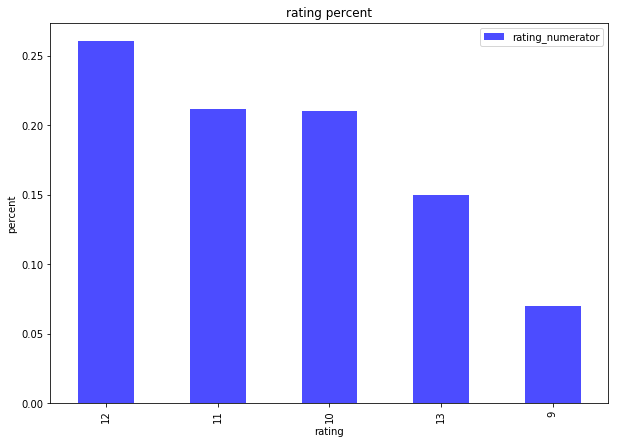

In [68]:
#plotting the ratings 
rating.plot(kind='bar', figsize=(10,7), title='rating percent', color='blue', alpha=0.7)
plt.xlabel('rating')
plt.ylabel('percent')
plt.legend()
plt.show()

#### Q2: Which breed gets most retweets?

In [69]:
#the sum of each dog breed retweet counts
clean_df.groupby('p1')['retweet_count'].sum().sort_values(ascending=False)

p1
golden_retriever                  650628
Labrador_retriever                490851
Pembroke                          336930
Chihuahua                         245728
Samoyed                           230845
French_bulldog                    158691
Eskimo_dog                        145876
Pomeranian                        130636
Lakeland_terrier                  123779
chow                              123472
cocker_spaniel                    111254
pug                               106338
toy_poodle                        103439
Cardigan                           93710
standard_poodle                    88651
Great_Pyrenees                     80753
malamute                           77216
German_shepherd                    75898
flat-coated_retriever              74554
Chesapeake_Bay_retriever           72684
Rottweiler                         61640
English_springer                   61207
Staffordshire_bullterrier          59424
miniature_pinscher                 58359
Shetland_shee

Am image of #1 dog breed.

In [70]:
#image url
img_urls = clean_df.query('p1 == "golden_retriever"')['jpg_url']
img_urls.head()

8     https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg
17    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg
39    https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg
46    https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg
52    https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg
Name: jpg_url, dtype: object

In [71]:
#single url
img_url = img_urls[52]
img_url

'https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg'

In [72]:
#importing module to help with displaying the golden_retriever
from IPython.display import Image
Image(url=img_url, width=300, height=200)

#### Q3: Which is the most favourite breed?

In [73]:
#sum of favorite count of each breed
clean_df.groupby('p1')['favorite_count'].sum().sort_values(ascending=False)

p1
golden_retriever               2147721
Labrador_retriever             1430845
Pembroke                       1165756
Chihuahua                       746762
Samoyed                         651229
French_bulldog                  597364
chow                            437339
cocker_spaniel                  369355
Pomeranian                      362882
Lakeland_terrier                352381
pug                             337603
Eskimo_dog                      326274
Cardigan                        317921
German_shepherd                 296227
toy_poodle                      283851
malamute                        259596
Chesapeake_Bay_retriever        259182
Staffordshire_bullterrier       232245
flat-coated_retriever           230021
Great_Pyrenees                  229215
miniature_pinscher              207958
standard_poodle                 205952
Rottweiler                      190607
Shetland_sheepdog               181967
basset                          180258
English_springer      

#### Q4: Which dog stages are most tweeted?

In [9]:
clean_df.groupby('dog_stages')['retweet_count'].sum().sort_values(ascending=False)

dog_stages
doggo      421372
pupper     400517
puppo      143674
floofer     38214
Name: retweet_count, dtype: int64

#### Q5: Which dog names are given to most dogs?

In [11]:
clean_df.name.value_counts().head()

Cooper     13
Charlie    11
Oliver     11
Lucy        9
Tucker      8
Name: name, dtype: int64

### Insights:
1. **26%** of dogs have a rating of **12**, **21%** a rating of **11** and **20%** a rating of **10**.

2. **golden_retriever** got the maximum number of retweets **788148** followed by **Labrador_retriever** at **551512** and **Chihuahua** at **345090**.

3. Again, the **golden_retriever** is the most favorite breed with **2194581** favorite count, number two being **Labrador_retriever** with **1430845** and number three is **Pembroke** with **1165756**.

4. **doggo** and **pupper** are most retweeted dog stages.

5. **Cooper**, **Charlie**, and **Oliver** are the most popular dog names.

In [12]:
#saving a html copy of this notebook
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0